# Electromagnetic Induction (EMI) method

**Author:** Alberto Carrera

Electromagnetic Induction (EMI) methods rely on the interaction between a time-varying primary magnetic field and the subsurface. A transmitter coil generates an oscillating magnetic field, which induces eddy currents in the conductive ground. These currents generate a secondary magnetic field, which is detected by a receiver coil. The strength and phase of this secondary field depend on the subsurface electrical conductivity distribution.

<img src=../figures/emi_rs2022.png  style="width:50%;"/>

## Theoretical Background

All electromagnetic phenomena are governed by Maxwell’s equations. In EMI surveys, two equations are particularly relevant:

#### Faraday’s Law of Induction
$$
\nabla \times \mathbf{E} = - \frac{\partial \mathbf{B}}{\partial t}
$$

- A time-varying magnetic field $B$ induces a circulating electric field $E$.  
> In EMI: the transmitter coil generates a varying magnetic field, inducing eddy currents in the subsurface.

#### Ampère-Maxwell Law
$$
\nabla \times \mathbf{H} = \mathbf{J} + \frac{\partial \mathbf{D}}{\partial t}, \quad \mathbf{J} = \sigma \mathbf{E}
$$

- Magnetic fields are generated by both conduction currents $J$ and displacement currents $\frac{\partial \mathbf{D}}{\partial t}$.  
> In EMI: the induced currents produce a secondary magnetic field detected by the receiver coil.

Assuming harmonic time dependence $(e^{i\omega t})$, Maxwell’s equations can be written in the frequency domain:

$$
\nabla \times \mathbf{E} = -i \omega \mu_0 \mathbf{H}, \qquad
\nabla \times \mathbf{H} = \sigma \mathbf{E} + i \omega \varepsilon_0 \mathbf{E}
$$

---

## Maxwell's Equations over a Layered Medium

In the context of a 1D horizontally layered, isotropic earth, the solution of Maxwell's equations for the secondary magnetic field at a receiver is:

$$
\mathbf{H}_s(\mathbf{r}) = \frac{1}{4 \pi} \int_0^\infty F(k, \sigma(z), \omega) \, J_n(k \rho) \, e^{-k z} \, k \, dk
$$
- $k$: horizontal wavenumber  
- $J_n$: Bessel function, depending on coil geometry (HCP, VCP)  
- $\rho$: horizontal transmitter–receiver distance  
- $F(k, \sigma(z), \omega)$: reflection/transmission coefficients for the layered medium

This formulation assumes:

- Electromagnetic fields propagate primarily due to conduction currents, valid at low frequencies.  
- The subsurface is modeled as a 1D layered earth, with $N$ horizontal, isotropic layers.

This forms the basis for the **Full Maxwell (FS) forward model** in `EMagPy`, providing the non-simplified response of the earth.

---

## Secondary-to-Primary Field Ratio and Apparent Conductivity
In EMI surveys, the measured quantity is the secondary magnetic field generated by eddy currents in the subsurface. To interpret these measurements, two key concepts are used:

#### 1. Field Ratio 
The ratio of the secondary to the primary field for a layered earth is:

$$
\frac{H_s}{H_p} = \int_0^\infty W(k; \rho, h, \omega, \sigma(z)) \, dk
$$

- $W(k; \cdot)$ is a kernel function accounting for:
  - subsurface conductivity profile $\sigma(z)$  
  - coil spacing and orientation  
  - instrument height $h$ above the ground  
  - frequency $\omega$  

This ratio contains both real (in-phase) and imaginary (quadrature) components, each carrying information about the subsurface.

Detailed explanation [here](https://em.geosci.xyz/content/maxwell3_fdem/circuitmodel_for_eminduction/index.html)  
<img src=../figures/Q-I.png  style="width:30%;"/>

#### 2. Apparent Conductivity
Using the instrument specifications, the apparent conductivity is derived from the quadrature component:

$$
\sigma_a = \frac{4}{\mu_0 \, \omega \, s^2} \, \Im \left( \frac{H_s}{H_p} \right)
$$

- $s$: coil spacing  
- $\Im$: imaginary (quadrature) component  
- The in-phase component provides complementary information at higher conductivities  

> $\sigma_a$ is a single-value measurement reflecting the integrated response of all layers beneath the instrument.

---

## LIN Approximation

For many practical cases, a simplified linear approximation, known as the Cumulative Sensitivity (CS) approach (McNeill, 1980) is used:

- assumes low induction number (LIN): the dimensionless induction number $B = \mu_0 \, \sigma \, \omega \, s^2 \ll 1$, meaning that secondary induction effects are negligible.    
- ignores secondary induction effects, so $\sigma_a$ is approximately a linear functional of $\sigma(z)$

Under LIN approximation, the ratio of secondary to primary magnetic field is linearly related to the apparent electrical conductivity (ECa). For a coil system with separation $s$ operated at frequency $f$, the apparent conductivity can be written as:

$$
\frac{H_s}{H_p} \approx i \, \omega \mu_0 \, \int_0^\infty K(z) \, \sigma(z) \, dz
$$

where:  
- $ H_s $ is the secondary magnetic field,  
- $ H_p $ is the primary magnetic field,  
- $ \omega = 2 \pi f $ is the angular frequency,  
- $ \mu_0 $ is the magnetic permeability of free space,  
- $ \sigma(z) $ is the true conductivity at depth $ z $,  
- $ K(z) $ is the cumulative sensitivity function (depth kernel), which depends on the coil configuration.

For layered earth models, the apparent conductivity is expressed as the weighted sum of the layer conductivities:

$$
\sigma_a = \sum_{j=1}^{N} w_j \, \sigma_j
$$

where $ \sigma_j $ is the conductivity of the $ j $-th layer and $ w_j $ are depth-dependent sensitivity weights.

This is computationally efficient and forms the basis of the CS forward model in `EMagPy`. It is less accurate for:

- high conductivity layers  
- thick conductive targets  
- elevated instrument heights  


---

**References:**  
- Wait, J. R. (1982). *Electromagnetic Methods in Applied Geophysics.* Academic Press.  
- Guptasarma, D., & Singh, S. (1997). Numerical calculation of Hankel transforms for EMI problems.  
- Anderson, W. L. (1979). Practical algorithms for EMI forward modelling.  
- McNeill, J. D. (1980). *Electromagnetic Terrain Conductivity Measurement.*
- McLachlan et al. (2021). *EMagPy: Open-source standalone software for processing, forward modeling and inversion of electromagnetic induction data*


# Forward modelling with EMagPy - 2 layers

This notebook shows how **Frequency Domain Electromagnetic** (FDEM) method works through `EMagPy`. The Python module can be downloaded from the website (https://gitlab.com/hkex/emagpy) or installed using `pip install emagpy`.  
The Python API is the working core of EMagPy and is what the GUI calls for processing the data. It allows more automated task to be written but also interactive execution in a jupyter notebook.  
The example is directly taken from [here](https://gitlab.com/hkex/emagpy/-/tree/master/jupyter-notebook?ref_type=heads)

In [1]:
# import modules
from emagpy import Problem
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5.5,3) 

## Introduction

The goal is to explore the synthetic modelling capabilities of EMagPy. The main class of the EMagPy is the `Problem` class, which contains methods for inverting (`Problem.invert()`) and modelling (`Problem.forward()`).  

Although EMagPy can use both cumulative sensitivity and a Maxwell based forward model, to run more quickly here we focus on the cumulative sensitivity function. From experience, the cumulative sensitvity function performs well when devices are operated at ground level in low conductivity environments.

Data will be generated for the specifications of the GF Instruments CMD Explorer device for the case when the device is operated at ground level (0 m elevation). This generation of synthetic data, and subsequent inverse modelling, can be done in 4 simple steps:

## 1. Define model parameters

In [2]:
nlayer = 2 # number of layers in model
npos = 50 # number of positions/sampling locations
x = np.linspace(0, 2*np.pi, npos)[:,None] # specify x position along transect
depths = 0.5 + (1+np.sin((x))) # generate depth based on x position along transect (positive!)
conds = np.ones((npos, nlayer))*[5, 35] # electrical conductivity in mS/m of upper and lower layer

## 2. Define device setup (coil configuration, frequency, height above ground)
In EMagPy device setup can be specified using the following:
- coil orientation: VCP (Vertical Co-Planar), HCP (Horizontal Co-Planar) or PRP (PeRPendicular)
- coil separation: separation between transmitter and receiver coil in metres
- frequency: operating frequency in Hz
- height above ground: operation height in metres

e.g. `VCP0.32f30000h1` is decomposed as:
- `VCP` orientation
- with `0.32` m coil separation
- operating at `30000` Hz frequency
- at `1` m above the ground.

For instance the device setup for the [GF Instruments CMD Explorer](http://www.gfinstruments.cz/index.php?menu=gi&cont=cmd_ov) operated at ground level are as follows:

In [3]:
coils0 = ['VCP1.48f10000h0', 'VCP2.82f10000h0', 'VCP4.49f10000h0', 'HCP1.48f10000h0', 'HCP2.82f10000h0', 'HCP4.49f10000h0']

## 3. Generate synthetic data

After creating an instance of the `Problem` class using `k = Problem()`. The conductivity model and the depth created at step 1 can be assigned using `k.setModels([depths], [conds])`.

Then `k.forward()` can be called with the following choice of arguments:
- `forwardModel` specifies the forward model to use among the available:
    - `CS` : Cumulative Senstivity (following McNeil 1980). Default and fastest forward model.
    - `CSgn` : Which is a fast Gauss-Newton inversion based on CS. Choosing this forward model will automatically make use of the `Problem.ìnvertGN()` method and ignore the arguments passed to `invert()` except `alpha`.
    - `FSlin` : Full Solution based on Maxwell's equations using the LIN (Low Induction Number) approximation to convert the quadrature (Q) to ECa
    - `FSeq` : Full Solution based on Maxwell's equations that doesn't rely on the LIN but rather compute an apparent value based on optimization (see [Andrade et al. (2016)](https://doi.org/10.3997/2214-4609.201602080)).
    - `Q` : Full Solution based on Maxwell's equations where the quadrature (Q) is directly minimize without being converted to ECa. This forward model is prefered for high EC (> 100 mS/m).  
- To solve the optimization problem, two types of solvers are available:
    - `L-BFGS-B` (default), `TNC`, `CG`, `Nelder-Mead` minimizes an objective function using `scipy.optimize.minimize()`.
    - `ROPE`, `SCEUA`, `DREAM` are MCMC-based method provided by the `spotpy` package that works well when the depth of each layer is not fixed.
- `noise` specifies the random (Gaussian) noise to be added to the data (e.g. noise=0.02 means 2% noise)

Forward modelling


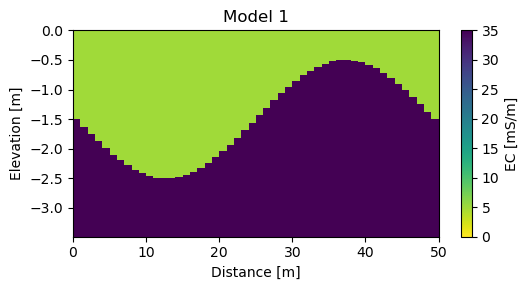

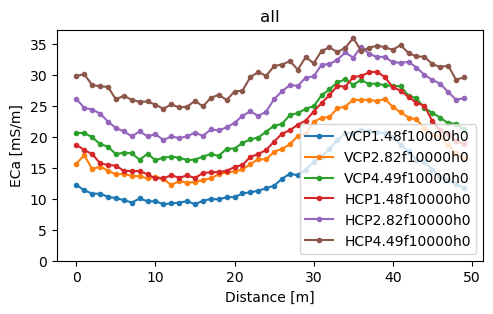

In [5]:
k = Problem() # create an instance of the Problem class
k.setModels([depths], [conds]) # create synthetic model based on conductivities and depths defined in step 1
k.forward(forwardModel='CS', coils=coils0, noise=0.02) # perform forward modellling with 2% noise
k.showResults(vmin=0) # show the model
k.show(vmin=0) # show the synthetic ECa generated

## 4. Invert synthetic data

First of all, the initial model needs to be specified using `setInit()`.

For instance `k.setInit(depths0=[0.5, 1], fixedDepths=[False, True], conds0=[30, 20, 20], fixedConds=[True, False, False])` specifies a 3 layer model with the bottom of the first layer at -0.5 m and the bottom of the second layer at -1 m (the third layer goes to $-\infty$). The depth of first layer is fixed while the depth of the second layer can be modified in the inversion. The EC of the first layer is 30 mS/m and is fixed in the inversion whilst the EC of the other layers is 20 mS/m an can vary during the inversion.


As with `forward()`, `invert()` uses several key arguments:
- `forwardModel` is required as described above.
- `method` specifies whether deterministic methods (`L-BFGS-B`, `CG`) or probablistic methods (`ROPE`, `SCEUA`) should be used.
- `regularization` specifies whether `l1` or `l2` regularization is used
- `njobs` specifies how many cores to use in parallel, `-1` will use all available cores, `-2` will use all but 1 core, otherwise a number can be specified
- `alpha` determines the influence of model misfit on the total misfit of the inverse problem
- `bnds` determines the boundaries for each parameter, e.g. for a 3 layer model `bnds=[(0.01, 3), (0, 80), (0, 80)])` would refer to a parameter bounds of 0.01 to 3 m for the bottom depth of layer 1 and 0 to 80 mS/m for upper and lower layer conductivities. 
> NOTE: If any parameter is specified as being `fixed` in `setInit()` then bnds should not be supplied for this parameter.

e.g. `k.invert(method='ROPE',forwardModel='FSeq', rep=6000, alpha=0, regularization='l1', njobs=-1, bnds=[(0.01, 3), (0, 80), (0, 80)]))`

The results can then be shown using `k.showResults()` and the misfit can be assessed using `k.showOne2one()` or `k.showMisfit()`.

Note that here as a probabilistic inversion method is used `k.showResults(errorbar=True)` can be specified to error bars representing the standard deviation of the posterior distribution (posterior distribution based on the 10% best samples).

50/50 inverted

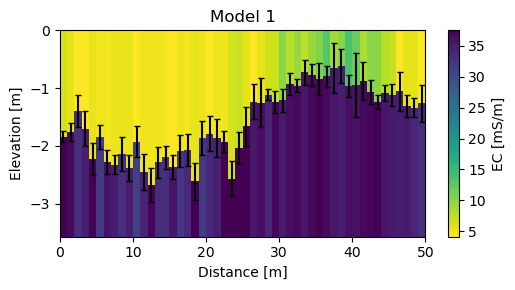

In [6]:
k.setInit(depths0=[1.5], fixedDepths=[False], # setting initial model and specify which are fixed
          conds0=[20, 20], fixedConds=[False, False])
k.invert(method='ROPE',forwardModel='CS', rep=1000, alpha=0, regularization='l2',
         bnds=[(0.01, 3), (0, 80), (0, 80)]) # inversion
k.showResults(errorbar=True) # show inverted model

# Forward modelling with EMagPy - anomaly
Now we generate a homogeneous layer (ex: 10 mS/m) with a superficial anomaly (ex: 50 mS/m)

Forward modelling


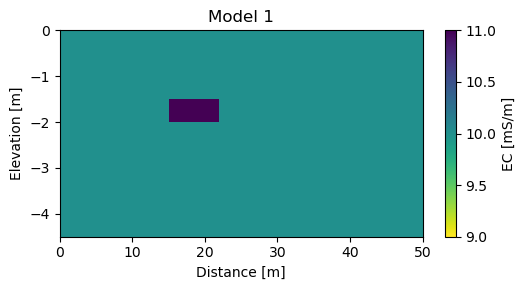

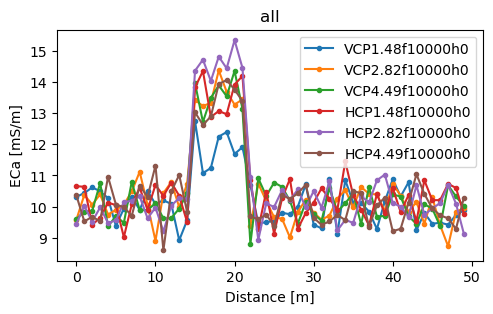

In [7]:
####### define model parameters #######

nlayer = 8    # n layer
npos   = 50   # meas points
x = np.linspace(0, 10, npos)[:, None]

#  boundary depth (nlayer - 1 = 4 profondità)
layer_depths = np.array([.5 , 1, 1.5, 2, 2.5, 3, 3.5])  # m
depths = np.tile(layer_depths, (npos, 1))

# homogeneous layer conductivity
conds = np.ones((npos, nlayer)) * 10  # mS/m

# anomaly extension
mask_x = (x[:,0] > 3) & (x[:,0] < 4.3) # in x
mask_z = (layer_depths > 1.5) & (layer_depths <= 2) # in z

# anomaly conductivity
for ix in np.where(mask_x)[0]:
    for iz in np.where(mask_z)[0]:
        conds[ix, iz] = 50   # mS/m

# coil system (survey)
coils0 = ['VCP1.48f10000h0', 'VCP2.82f10000h0', 'VCP4.49f10000h0', 'HCP1.48f10000h0', 'HCP2.82f10000h0', 'HCP4.49f10000h0']

# forward modeling
k = Problem()
k.setModels([depths], [conds])
k.forward(forwardModel="CS", coils=coils0, noise=0.05)

k.showResults()
k.show()

50/50 inverted

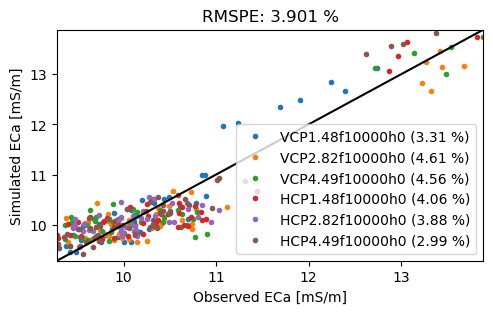

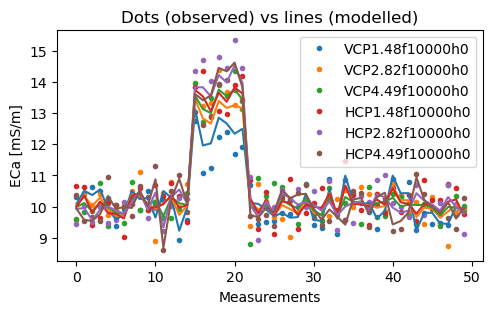

In [8]:
####### invert #######
depths = np.arange(.5, 4.5, .5)
conds = np.ones(depths.shape[0]+1)*5 # initial EC (mS/m)

k.setInit(depths0=depths, conds0=conds)
k.invert(#method='Gauss-Newton',forwardModel='FSlin', regularization='l2',
         method='L-BFGS-B',forwardModel='CS',
         ) # inversion
k.showOne2one()
k.showMisfit() 

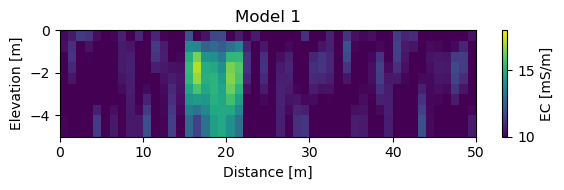

In [38]:
####### plot #######
import matplotlib as mpl
import matplotlib.patches as patches

figdir = '../figures/'
fig, ax = plt.subplots(figsize=(6, 2))

k.showResults(ax=ax, cmap='viridis',
              #contour=True, 
              #rmse=True,
              vmin=10, vmax=18
              )

#ax.legend(loc='upper right')
fig.tight_layout()

fig.savefig(figdir + 'fwd-inv.jpg', dpi=150)